In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('Flights19.pkl')

In [3]:
df

,Route,Month,Carrier,From,FCity,FST,FShare,FGDPpc,To,TCity,...,TShare,TGDPpc,Delay,Flights,Dist,Pop_x,Pop_y,Hub,Away,Within
0,ABE-ATL,1,9E,ABE,Allentown,PA,3.87,62.66,ATL,Atlanta,...,2.90,56.03,7.0,41,692,0.1,0.52,1,0,0
1,ABE-ATL,1,DL,ABE,Allentown,PA,3.87,62.66,ATL,Atlanta,...,2.90,56.03,-1.0,26,692,0.1,0.52,1,0,0
2,ABE-ATL,2,9E,ABE,Allentown,PA,3.87,62.66,ATL,Atlanta,...,2.90,56.03,20.0,34,692,0.1,0.52,1,0,0
3,ABE-ATL,2,DL,ABE,Allentown,PA,3.87,62.66,ATL,Atlanta,...,2.90,56.03,2.0,28,692,0.1,0.52,1,0,0
4,ABE-ATL,3,9E,ABE,Allentown,PA,3.87,62.66,ATL,Atlanta,...,2.90,56.03,5.0,57,692,0.1,0.52,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122568,YUM-PHX,10,YV,YUM,Yuma,AZ,1.71,48.15,PHX,Phoenix,...,1.71,48.15,6.0,57,160,0.1,1.70,0,0,1
122569,YUM-PHX,11,OO,YUM,Yuma,AZ,1.71,48.15,PHX,Phoenix,...,1.71,48.15,4.0,102,160,0.1,1.70,0,0,1
122570,YUM-PHX,11,YV,YUM,Yuma,AZ,1.71,48.15,PHX,Phoenix,...,1.71,48.15,5.0,40,160,0.1,1.70,0,0,1
122571,YUM-PHX,12,OO,YUM,Yuma,AZ,1.71,48.15,PHX,Phoenix,...,1.71,48.15,-1.0,88,160,0.1,1.70,0,0,1


Finally, we create some more dummy variables.

We are going to create a dummy that specifies whether the state is in the coast or not, and another one to check whether the observation belongs to a month during summer or not. These two dummies can make a lot of sense if we assume that there is an increase in tourism and demand for air travel during the summer months to destinations in the coast. 

In [4]:
df['Coast'] = np.where(df['FST'].isin(['CA', 'FL', 'HI', 'OR', 'TX', 'NC']) 
                       + df['TST'].isin(['CA', 'FL', 'HI', 'OR', 'TX', 'NC']) > 0, 1, 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:177: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [5]:
df[df['Coast'] == 1]

,Route,Month,Carrier,From,FCity,FST,FShare,FGDPpc,To,TCity,...,TGDPpc,Delay,Flights,Dist,Pop_x,Pop_y,Hub,Away,Within,Coast
32,ABE-CLT,1,OH,ABE,Allentown,PA,3.87,62.66,CLT,Charlotte,...,54.24,2.0,85,481,0.1,0.91,0,0,0,1
33,ABE-CLT,2,OH,ABE,Allentown,PA,3.87,62.66,CLT,Charlotte,...,54.24,6.0,80,481,0.1,0.91,0,0,0,1
34,ABE-CLT,3,OH,ABE,Allentown,PA,3.87,62.66,CLT,Charlotte,...,54.24,5.0,93,481,0.1,0.91,0,0,0,1
35,ABE-CLT,4,OH,ABE,Allentown,PA,3.87,62.66,CLT,Charlotte,...,54.24,11.0,90,481,0.1,0.91,0,0,0,1
36,ABE-CLT,5,OH,ABE,Allentown,PA,3.87,62.66,CLT,Charlotte,...,54.24,-6.0,83,481,0.1,0.91,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122548,YUM-DFW,8,OO,YUM,Yuma,AZ,1.71,48.15,DFW,Dallas,...,61.70,12.0,31,1022,0.1,1.38,1,0,0,1
122549,YUM-DFW,9,OO,YUM,Yuma,AZ,1.71,48.15,DFW,Dallas,...,61.70,1.0,30,1022,0.1,1.38,1,0,0,1
122550,YUM-DFW,10,OO,YUM,Yuma,AZ,1.71,48.15,DFW,Dallas,...,61.70,-9.0,31,1022,0.1,1.38,1,0,0,1
122551,YUM-DFW,11,OO,YUM,Yuma,AZ,1.71,48.15,DFW,Dallas,...,61.70,-12.0,30,1022,0.1,1.38,1,0,0,1


In [6]:
df['Summer'] = np.where(df['Month'].isin([6, 7, 8]), 1, 0)

In [7]:
df

,Route,Month,Carrier,From,FCity,FST,FShare,FGDPpc,To,TCity,...,Delay,Flights,Dist,Pop_x,Pop_y,Hub,Away,Within,Coast,Summer
0,ABE-ATL,1,9E,ABE,Allentown,PA,3.87,62.66,ATL,Atlanta,...,7.0,41,692,0.1,0.52,1,0,0,0,0
1,ABE-ATL,1,DL,ABE,Allentown,PA,3.87,62.66,ATL,Atlanta,...,-1.0,26,692,0.1,0.52,1,0,0,0,0
2,ABE-ATL,2,9E,ABE,Allentown,PA,3.87,62.66,ATL,Atlanta,...,20.0,34,692,0.1,0.52,1,0,0,0,0
3,ABE-ATL,2,DL,ABE,Allentown,PA,3.87,62.66,ATL,Atlanta,...,2.0,28,692,0.1,0.52,1,0,0,0,0
4,ABE-ATL,3,9E,ABE,Allentown,PA,3.87,62.66,ATL,Atlanta,...,5.0,57,692,0.1,0.52,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122568,YUM-PHX,10,YV,YUM,Yuma,AZ,1.71,48.15,PHX,Phoenix,...,6.0,57,160,0.1,1.70,0,0,1,0,0
122569,YUM-PHX,11,OO,YUM,Yuma,AZ,1.71,48.15,PHX,Phoenix,...,4.0,102,160,0.1,1.70,0,0,1,0,0
122570,YUM-PHX,11,YV,YUM,Yuma,AZ,1.71,48.15,PHX,Phoenix,...,5.0,40,160,0.1,1.70,0,0,1,0,0
122571,YUM-PHX,12,OO,YUM,Yuma,AZ,1.71,48.15,PHX,Phoenix,...,-1.0,88,160,0.1,1.70,0,0,1,0,0


In [8]:
df['Hub'].value_counts()

0    64271
1    58302
Name: Hub, dtype: int64

## Model.
We are now going to make our model. 

First of all, we are going to take away all the variables that are strings. We have all the joined information of those in the dataframe anyways, so we do not need them anymore. Moreover, we cannot include any kind of non-numerical data to the Machine Learning model.

Next we will check the correlations between the variables. We would discard a variable when there is a correlation around 0.75.

Finally, we will run different models. We are going to go with the linear regression since it should be good enough for our model. What we will be doing is to change the choice of the dummies and the regressors: we will be including or excluding variables in each model or changing how those are defined for each model, and at the end we will take the best performing model. For the model evaluation, we are going to choose the one which has a higher R^2 and the one with the lowest Akaike Information Criterion (AIC), which should be the same model.

As a baseline, we know we do not have a lot of relevant information that could explain the amount of flights. Even though we have expanded the dataset with economic and demographic variables, there should be other factors such as prices, demand, and surely many externalities such as oil prices, for example. Because of this assumption, we will be quite happy if our model can explain around 50 to 60% of the variation, which can be improved with more quality information.

In [9]:
dfm = df[['Flights', 'Month', 'FShare', 'FGDPpc', 'Pop_x', 'TShare', 'TGDPpc', 'Pop_y', 'Dist', 'Hub', 'Away', 'Within', 'Coast', 'Summer']]

In [10]:
dfm

,Flights,Month,FShare,FGDPpc,Pop_x,TShare,TGDPpc,Pop_y,Dist,Hub,Away,Within,Coast,Summer
0,41,1,3.87,62.66,0.1,2.90,56.03,0.52,692,1,0,0,0,0
1,26,1,3.87,62.66,0.1,2.90,56.03,0.52,692,1,0,0,0,0
2,34,2,3.87,62.66,0.1,2.90,56.03,0.52,692,1,0,0,0,0
3,28,2,3.87,62.66,0.1,2.90,56.03,0.52,692,1,0,0,0,0
4,57,3,3.87,62.66,0.1,2.90,56.03,0.52,692,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122568,57,10,1.71,48.15,0.1,1.71,48.15,1.70,160,0,0,1,0,0
122569,102,11,1.71,48.15,0.1,1.71,48.15,1.70,160,0,0,1,0,0
122570,40,11,1.71,48.15,0.1,1.71,48.15,1.70,160,0,0,1,0,0
122571,88,12,1.71,48.15,0.1,1.71,48.15,1.70,160,0,0,1,0,0


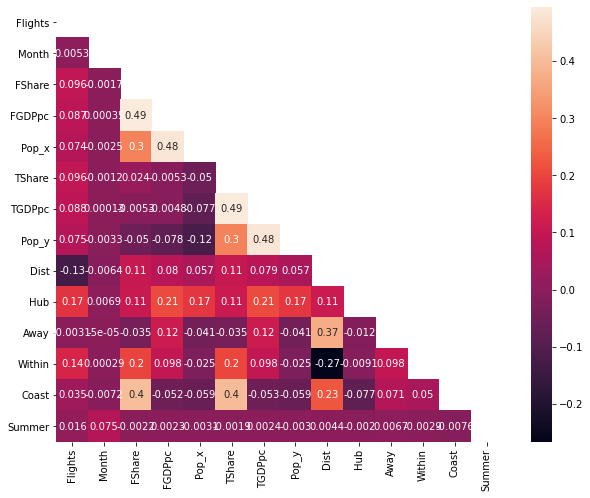

In [11]:
correlations_matrix = dfm.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [12]:
# We define y as the Flights column which is going to be our independent variable, the one the model wants to explain.
# This is going to be the same for all the models, so we don't need to redefine it every time.

y = dfm['Flights']

### Model 1.
For the first model, we will run it with the following regressors:

- GDP per capita will be the added value of both (origin and destination) states. (We will always express this in hundreds of thousands of dollars, just to keep numbers to a low scale.
- Population will be represented in millions, and instead of adding both values, we will multiply them. This serves to a particular benefit: we want small cities to weight a lot. An example could be that there should be the assumption that there will be more flights within two cities having a million inhabitants than within a city with 2 million and a city with 0.1 millions. If we just add the values, it will not reflect this fact.
- The Share of GDP of both (origin and destination) states will be represented as a percentage, and they will be added.

In [13]:
dfm1 = dfm.copy()

In [14]:
dfm1['GDP'] = (dfm1['FGDPpc'] + dfm1['TGDPpc']) * 0.01

In [15]:
dfm1['Pop'] = dfm1['Pop_x'] * dfm1['Pop_y']

In [16]:
dfm1['Share'] = dfm1['FShare'] + dfm1['TShare']

In [17]:
dfm1.drop(['FShare', 'FGDPpc', 'Pop_x', 'TShare', 'TGDPpc', 'Pop_y'], inplace = True, axis = 1)

In [18]:
dfm1.drop('Month', inplace = True, axis = 1)

In [19]:
dfm1

,Flights,Dist,Hub,Away,Within,Coast,Summer,GDP,Pop,Share
0,41,692,1,0,0,0,0,1.1869,0.052,6.77
1,26,692,1,0,0,0,0,1.1869,0.052,6.77
2,34,692,1,0,0,0,0,1.1869,0.052,6.77
3,28,692,1,0,0,0,0,1.1869,0.052,6.77
4,57,692,1,0,0,0,0,1.1869,0.052,6.77
...,...,...,...,...,...,...,...,...,...,...
122568,57,160,0,0,1,0,0,0.9630,0.170,3.42
122569,102,160,0,0,1,0,0,0.9630,0.170,3.42
122570,40,160,0,0,1,0,0,0.9630,0.170,3.42
122571,88,160,0,0,1,0,0,0.9630,0.170,3.42


In [20]:
X = dfm1.drop('Flights', axis = 1)

In [21]:
import statsmodels.api as sm

In [22]:
linreg = sm.OLS(y, X)
linreg.fit()
print(linreg.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                Flights   R-squared (uncentered):                   0.523
Model:                            OLS   Adj. R-squared (uncentered):              0.523
Method:                 Least Squares   F-statistic:                          1.495e+04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:12:35   Log-Likelihood:                     -6.8102e+05
No. Observations:              122573   AIC:                                  1.362e+06
Df Residuals:                  122564   BIC:                                  1.362e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This first model performs quite okay, explaining around 52% of the variation within the model. We will continue performing other models and checking if there are combinations of regressors or other definitions of the features that make a better performing model.

In [23]:
dfm

,Flights,Month,FShare,FGDPpc,Pop_x,TShare,TGDPpc,Pop_y,Dist,Hub,Away,Within,Coast,Summer
0,41,1,3.87,62.66,0.1,2.90,56.03,0.52,692,1,0,0,0,0
1,26,1,3.87,62.66,0.1,2.90,56.03,0.52,692,1,0,0,0,0
2,34,2,3.87,62.66,0.1,2.90,56.03,0.52,692,1,0,0,0,0
3,28,2,3.87,62.66,0.1,2.90,56.03,0.52,692,1,0,0,0,0
4,57,3,3.87,62.66,0.1,2.90,56.03,0.52,692,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122568,57,10,1.71,48.15,0.1,1.71,48.15,1.70,160,0,0,1,0,0
122569,102,11,1.71,48.15,0.1,1.71,48.15,1.70,160,0,0,1,0,0
122570,40,11,1.71,48.15,0.1,1.71,48.15,1.70,160,0,0,1,0,0
122571,88,12,1.71,48.15,0.1,1.71,48.15,1.70,160,0,0,1,0,0


### Model 2.
For this second model, we are going to include the variable SumCoa, which allows for synergies between the dummies Summer and Coast. This allows for a more flexible model: Coast will reflect the average difference between flights going from/to the coast and non-coast; Summer will do the same between months in the summer season and the rest of the years. The average difference between a non-coast airport not in summer and a coast airport in summer, according to model 1, will be the coefficient of Coast + coefficient of Summer. The values of these coefficients are calculated separately, that is to say, when one of them is applied, and it explains the average difference of those two groups created. 

However, there is a slight problem with that, and that is the synergies within variables. How can we explain that, for example, the following case:

- Non-Coast state, Non-Summer: 100 flights a month.
- Non-Coast state, Summer: 150 flights a month.
- Coast state, Non-Summer, 140 flights a month.
- Coast state, Summer, 250 flights a month.

We can see in the first three observations that the Coast coefficient should be 40, as that is the difference between a coast and a non-coast state during low season. For Summer, its coefficient should be 50, as that is the difference in the same state's flights between summer and the rest of the months. We should expect for a coast state in summer to receive 190 flights (100 + 40 + 50) according to our variables, but it is much higher than that. This can be explained because of the synergy between Coast and Summer. When both features are present in an observation there may be an additional effect that each of the features cannot explain by itself. In this case, it is useful to create an extra variable, which takes the value 1 when both Coast and Summer are 1, and 0 when any of them are 0 (SumCoa = Summer * Coast). This will allow us to capture those extra effects due to the combination of dummies.

For this second model we are going to see whether the Summer and Coast are needed separately or jointly, and we will run a model only with SumCoa, while dropping Summer and Coast.

In [24]:
dfm2 = dfm.copy()
y = dfm['Flights']
dfm2['GDP'] = (dfm2['FGDPpc'] + dfm2['TGDPpc']) * 0.01
dfm2['Pop'] = dfm2['Pop_x'] * dfm2['Pop_y']
dfm2['Share'] = dfm2['FShare'] + dfm2['TShare']
dfm2['Dist'] = np.log(dfm2['Dist'])
dfm2['SumCoa'] = dfm2['Summer'] * dfm2['Coast']
dfm2.drop(['FShare', 'FGDPpc', 'Pop_x', 'TShare', 'TGDPpc', 'Pop_y', 'Month', 'Summer', 'Coast'], inplace = True, axis = 1)
X = dfm2.drop('Flights', axis = 1)
linreg = sm.OLS(y, X)
linreg.fit()
print(linreg.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                Flights   R-squared (uncentered):                   0.510
Model:                            OLS   Adj. R-squared (uncentered):              0.510
Method:                 Least Squares   F-statistic:                          1.597e+04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:12:35   Log-Likelihood:                     -6.8266e+05
No. Observations:              122573   AIC:                                  1.365e+06
Df Residuals:                  122565   BIC:                                  1.365e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This model is performing worse than the previous one according to the R^2 and the AIC.

### Model 3.

We are going to include all three variables, Summer, Coast and SumCoa.

In [25]:
dfm3 = dfm.copy()
y = dfm['Flights']
dfm3['GDP'] = (dfm3['FGDPpc'] + dfm3['TGDPpc']) * 0.01
dfm3['Pop'] = dfm3['Pop_x'] * dfm3['Pop_y']
dfm3['Share'] = dfm3['FShare'] + dfm3['TShare']
dfm3['SumCoa'] = dfm3['Summer'] * dfm3['Coast']
dfm3.drop(['FShare', 'FGDPpc', 'Pop_x', 'TShare', 'TGDPpc', 'Pop_y', 'Month'], inplace = True, axis = 1)
X = dfm3.drop('Flights', axis = 1)
linreg = sm.OLS(y, X)
linreg.fit()
print(linreg.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                Flights   R-squared (uncentered):                   0.523
Model:                            OLS   Adj. R-squared (uncentered):              0.523
Method:                 Least Squares   F-statistic:                          1.346e+04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:12:36   Log-Likelihood:                     -6.8101e+05
No. Observations:              122573   AIC:                                  1.362e+06
Df Residuals:                  122563   BIC:                                  1.362e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The previous model is as good as the first one. 

### Model 4.

We are going to continue tweaking and see if we can improve its performance. This time we are going to try with a new variable: Share^2.

The goal of including this variable is to be able to capture a possible decreasing effect of the impact of Share in the number of flights. For example, the increase in the number of flights of increasing the share of GDP from 3 to 4% could be more significant than the increase from 9 to 10%. This squared variable is going to capture this changes throughout the range of Share.

In [26]:
dfm2 = dfm.copy()
dfm2['GDP'] = (dfm2['FGDPpc'] + dfm2['TGDPpc']) * 0.01
dfm2['Pop'] = dfm2['Pop_x'] * dfm2['Pop_y']
dfm2['Share'] = (dfm2['FShare'] * dfm2['TShare'])
dfm2['Share2'] = dfm2['Share'] ** 2
dfm2['SumCoa'] = dfm2['Summer'] * dfm2['Coast']
dfm2.drop(['FShare', 'FGDPpc', 'Pop_x', 'TShare', 'TGDPpc', 'Pop_y', 'Month'], inplace = True, axis = 1)
X = dfm2.drop('Flights', axis = 1)
linreg = sm.OLS(y, X)
linreg.fit()
print(linreg.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                Flights   R-squared (uncentered):                   0.525
Model:                            OLS   Adj. R-squared (uncentered):              0.525
Method:                 Least Squares   F-statistic:                          1.230e+04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:12:36   Log-Likelihood:                     -6.8083e+05
No. Observations:              122573   AIC:                                  1.362e+06
Df Residuals:                  122562   BIC:                                  1.362e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The model performs slightly better, and all variables are still statistically significant, so we can conclude that the inclusion of Share2 has been a good idea.

### Model 5.

We are now going to create a new variable. We can think that the amount of flights within 2 cities could also be explained by the amount of carriers performing that particular route: the more carriers, the larger amount of flights. So we will group the routes and add a variable that counts the amount of carriers performing such routes. Then we will perform a model including this variable.

In [27]:
dfg = df.copy()

In [28]:
dfg = dfg.groupby(['Route', 'Month']).agg({'Carrier': 'count',
                          'FShare': 'first',
                          'FGDPpc': 'first',
                          'TShare': 'first',
                          'TGDPpc': 'first',
                          'Delay': 'mean',
                          'Flights': 'sum',
                          'Dist': 'first',
                          'Pop_x': 'first',
                          'Pop_y': 'first',
                          'Hub': 'first',
                          'Away': 'first',
                          'Within': 'first',
                          'Coast': 'first',
                          'Summer': 'first'
                         })

In [29]:
dfg = dfg.reset_index()

In [30]:
dfg[dfg['Route'] == 'MIA-CMH']

,Route,Month,Carrier,FShare,FGDPpc,TShare,TGDPpc,Delay,Flights,Dist,Pop_x,Pop_y,Hub,Away,Within,Coast,Summer
40167,MIA-CMH,1,4,5.1,48.16,3.32,58.66,2.0,174,990,0.49,0.92,1,0,0,1,0
40168,MIA-CMH,2,4,5.1,48.16,3.32,58.66,1.0,166,990,0.49,0.92,1,0,0,1,0
40169,MIA-CMH,3,4,5.1,48.16,3.32,58.66,-1.5,196,990,0.49,0.92,1,0,0,1,0
40170,MIA-CMH,4,2,5.1,48.16,3.32,58.66,-1.0,122,990,0.49,0.92,1,0,0,1,0
40171,MIA-CMH,5,4,5.1,48.16,3.32,58.66,-2.5,240,990,0.49,0.92,1,0,0,1,0
40172,MIA-CMH,6,2,5.1,48.16,3.32,58.66,15.0,240,990,0.49,0.92,1,0,0,1,1
40173,MIA-CMH,7,2,5.1,48.16,3.32,58.66,3.0,248,990,0.49,0.92,1,0,0,1,1
40174,MIA-CMH,8,4,5.1,48.16,3.32,58.66,1.5,246,990,0.49,0.92,1,0,0,1,1
40175,MIA-CMH,9,4,5.1,48.16,3.32,58.66,-7.5,234,990,0.49,0.92,1,0,0,1,0
40176,MIA-CMH,10,2,5.1,48.16,3.32,58.66,-8.0,238,990,0.49,0.92,1,0,0,1,0


In [31]:
dfg['Carrier'].value_counts()

1     37518
2     15896
3      7736
4      4075
5      1370
6       675
7       145
8       102
10       64
12       32
Name: Carrier, dtype: int64

In [32]:
dfg1 = dfg.copy()
y = dfg['Flights']
dfg1['GDP'] = (dfg1['FGDPpc'] + dfg1['TGDPpc']) * 0.01
dfg1['Pop'] = dfg1['Pop_x'] * dfg1['Pop_y']
dfg1['Dist'] = dfg1['Dist'] / 1000
dfg1['Share'] = (dfg1['FShare'] + dfg1['TShare'])
dfg1['Share2'] = dfg1['Share'] ** 2
dfg1['SumCoa'] = dfg1['Summer'] * dfg1['Coast']
dfg1.drop(['Route', 'Delay', 'FShare', 'FGDPpc', 'Pop_x', 'TShare', 'TGDPpc', 'Pop_y', 'Month'], inplace = True, axis = 1)
X = dfg1.drop('Flights', axis = 1)
linreg = sm.OLS(y, X)
model = linreg.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Flights   R-squared (uncentered):                   0.729
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                          1.515e+04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:12:36   Log-Likelihood:                     -3.9964e+05
No. Observations:               67613   AIC:                                  7.993e+05
Df Residuals:                   67601   BIC:                                  7.994e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Surprise! Apparently this variable is really important to explain the amount of flights wihin 2 cities as our model now explains around a 73% of the variation within our samples. We can see that carrier has a large positive coefficient, so an additional carrier in a route would increase the number of flights through such route by an average of 63.4 flights per month. 

However, the inclusion of this variable has made SumCoa be not statistically significant at the 5% level, and it has changed the coefficients of all the other variables. But on the plus side, if this implies such an increase in the R^2 value, it definitely means the variable should be included in the model.

After testing several combinations of regressors and definition of variables, we are going to keep the very last model and perform some forecasting for 3 pairs of cities that are unconnected and where we want to say how many flights could be operated between them if we opened a route there.

### Model prediction.

Finally, we are going to predict the amount of flights for new routes. We have chosen 3 pairs of cities with different particularities, to see how predictions would differ:

- Miami, FL to Portland, OR.
- Boston, MA to San Antonio, TX.
- Pittsburgh, PA to Kansas City, MO.

As we can see in the dataframe, we have 2 routes where Coast is 1, and a route where it is 0. For each of the pairs of cities, we are going to predict 2 values: one for the summer months and one for the rest of the year.

In [33]:
xp = pd.DataFrame([['MIA-PDX', 1, 2.70, 1, 0, 0, 1, 0, 1.047, 1.51,  6.27,  39.31, 0],
                   ['MIA-PDX', 1, 2.70, 1, 0, 0, 1, 1, 1.047, 1.51,  6.27,  39.31, 1],
                   ['BOS-SAT', 1, 1.76, 1, 0, 0, 1, 0, 1.442, 1.05, 11.43, 130.64, 0],
                   ['BOS-SAT', 1, 1.76, 1, 0, 0, 1, 1, 1.442, 1.05, 11.43, 130.64, 1],
                   ['PIT-MCI', 1, 0.77, 0, 0, 0, 0, 0, 1.151, 2.64,  5.43,  29.49, 0],
                   ['PIT-MCI', 1, 0.77, 0, 0, 0, 0, 1, 1.151, 2.64,  5.43,  29.49, 0],],
                 columns = ['Route', 'Carrier', 'Dist', 'Hub', 'Away', 'Within', 'Coast',
                            'Summer', 'GDP', 'Pop', 'Share', 'Share2', 'SumCoa'])
xp

,Route,Carrier,Dist,Hub,Away,Within,Coast,Summer,GDP,Pop,Share,Share2,SumCoa
0,MIA-PDX,1,2.70,1,0,0,1,0,1.047,1.51,6.27,39.31,0
1,MIA-PDX,1,2.70,1,0,0,1,1,1.047,1.51,6.27,39.31,1
2,BOS-SAT,1,1.76,1,0,0,1,0,1.442,1.05,11.43,130.64,0
3,BOS-SAT,1,1.76,1,0,0,1,1,1.442,1.05,11.43,130.64,1
4,PIT-MCI,1,0.77,0,0,0,0,0,1.151,2.64,5.43,29.49,0
5,PIT-MCI,1,0.77,0,0,0,0,1,1.151,2.64,5.43,29.49,0


In [34]:
model.predict(xp.drop('Route', axis = 1))

0    24.289652
1    28.062687
2    52.866719
3    56.639753
4    56.343079
5    63.151320
dtype: float64

The model has predicted this amounts of flights for each of the cases. Given the data we have seen before, it seems quite okay, fitting within the range of values. All the routes would be performed once or twice daily if there was only one carrier involved, with a very slight increase during the summer months.

We could improve this model by including all the aforementioned variables, or estimates of them, and see how the model becomes more explanatory. This project has achieved its mission to find how the regressors follow a pattern throughout the sample and how they individually and jointly affect the amount of flights within a couple of cities, up to the point that we can predict how many flights could be operated if a new route was opened.